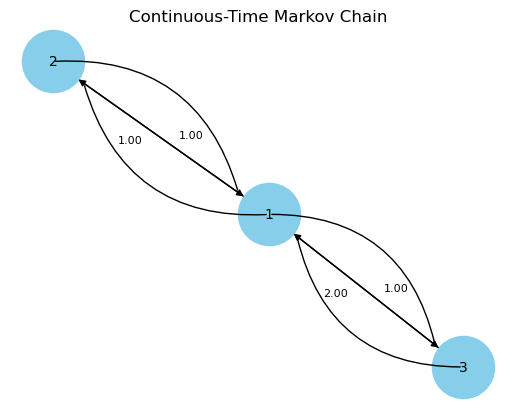

In [92]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Infinitesimal generator matrix Q
Q = np.array([[-2, 1, 1],
              [1, -1, 0],
              [2, 0, -2]])

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_states = Q.shape[0]
G.add_nodes_from(range(1, num_states + 1))

# Add edges with weights (transition rates) in both directions
for i in range(num_states):
    for j in range(num_states):
        if Q[i, j] > 0:  # Only include positive rates
            if i != j:  # For transitions to different states
                G.add_edge(i+1, j+1, weight=Q[i, j])
            else:  # For self-loops
                G.add_edge(i+1, j+1, weight=Q[i, j] / 2)  # Split weight for self-loops

# Draw graph
pos = nx.spring_layout(G)  # positions for all nodes

# Draw edges
for edge in G.edges():
    source, target = edge
    weight = G.get_edge_data(source, target)['weight']
    if G.has_edge(target, source):  # Check if it is a bidirectional transition
        nx.draw_networkx_edges(G, pos, edgelist=[(source, target)], width=weight/10, arrows=False, edge_color='green')
    else:
        nx.draw_networkx_edges(G, pos, edgelist=[(source, target)], width=weight/10, arrows=True, edge_color='blue')

# Draw nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10)

# Draw arrows with adjusted positions and annotations for transition rates
for source, target in G.edges():
    weight = G.get_edge_data(source, target)['weight']
    angle = np.arctan2(pos[target][1] - pos[source][1], pos[target][0] - pos[source][0])
    arrow_pos = np.array(pos[source]) + 0.15 * np.array([np.cos(angle), np.sin(angle)])
    plt.annotate("", xy=pos[target], xytext=arrow_pos,
                 arrowprops=dict(arrowstyle="->" if not G.has_edge(target, source) else "-", connectionstyle="arc3,rad=0.4"))
    
    # Offset the annotation for bidirectional transitions
    if G.has_edge(target, source):  # Check if it is a bidirectional transition
        offset = np.array([np.cos(angle + np.pi/2), np.sin(angle + np.pi/2)]) * 0.05
        plt.text(0.5*(pos[source][0] + pos[target][0]) + offset[0], 
                 0.5*(pos[source][1] + pos[target][1]) + offset[1], 
                 f"{weight:.2f}",
                 horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')
    else:
        plt.text(0.5*(pos[source][0] + pos[target][0]), 0.5*(pos[source][1] + pos[target][1]), 
                 f"{weight:.2f}",
                 horizontalalignment='center', verticalalignment='center', fontsize=8, color='black')

plt.title("Continuous-Time Markov Chain")
plt.show()
